## Loading the dataset...

In [1]:
import pandas
from scipy import stats
dataset = pandas.read_csv("benchmark-dataset.csv")
dataset

,run_id,device,OS,browser,engine,power,approach,loop_type,cycles,duration,timestamp,useragent
0,1,Dell Laptop,Windows,Firefox,Gecko,plugged,Canvas,async,20,342,2021-12-07T13:42:04.035Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:9...
1,1,Dell Laptop,Windows,Firefox,Gecko,plugged,Canvas,sync,20,171,2021-12-07T13:42:04.206Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:9...
2,1,Dell Laptop,Windows,Firefox,Gecko,plugged,HTML_flex,async,20,1096,2021-12-07T13:42:05.303Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:9...
3,1,Dell Laptop,Windows,Firefox,Gecko,plugged,HTML_flex,sync,20,238,2021-12-07T13:42:05.541Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:9...
4,1,Dell Laptop,Windows,Firefox,Gecko,plugged,HTML_float,async,20,2946,2021-12-07T13:42:08.487Z,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:9...
...,...,...,...,...,...,...,...,...,...,...,...,...
85,9,Xiaomi Phone,Android,Built-in browser,Chromium,battery,HTML_float,sync,20,1335,2021-12-07T13:59:26.636Z,Mozilla/5.0 (Linux; U; Android 10; en-gb; Redm...
86,9,Xiaomi Phone,Android,Built-in browser,Chromium,battery,HTML_absolute,async,20,26143,2021-12-07T13:59:52.779Z,Mozilla/5.0 (Linux; U; Android 10; en-gb; Redm...
87,9,Xiaomi Phone,Android,Built-in browser,Chromium,battery,HTML_absolute,sync,20,2080,2021-12-07T13:59:54.859Z,Mozilla/5.0 (Linux; U; Android 10; en-gb; Redm...
88,9,Xiaomi Phone,Android,Built-in browser,Chromium,battery,SVG,async,20,8332,2021-12-07T14:00:03.191Z,Mozilla/5.0 (Linux; U; Android 10; en-gb; Redm...


### Which approach is the quickest in each condition?

In [2]:
pivoted_data = dataset.pivot(index=['device','browser','run_id','loop_type'], columns=['approach'], values='duration')
ranked_data = pivoted_data.rank(axis=1)
ranked_data

approach                                        Canvas  HTML_absolute  \
device       browser          run_id loop_type                          
Dell Laptop  Chrome           2      async         1.0            5.0   
                                     sync          1.0            4.0   
                              6      async         1.0            5.0   
                                     sync          1.0            4.0   
             Edge             3      async         1.0            5.0   
                                     sync          1.0            4.0   
                              5      async         1.0            5.0   
                                     sync          1.0            4.0   
             Firefox          1      async         1.0            3.0   
                                     sync          1.0            4.0   
                              4      async         1.0            2.0   
                                     sync          1.0            3.0   
Xiaomi Phone Built-in browser 9      async         1.0            5.0   
                                     sync          1.0            4.0   
             Chrome           7      async         1.0            5.0   
                                     sync          1.0            4.0   
             Firefox          8      async         1.0            4.0   
                                     sync          1.0            5.0   

approach                                        HTML_flex  HTML_float  SVG  
device       browser          run_id loop_type                              
Dell Laptop  Chrome           2      async            3.0         2.0  4.0  
                                     sync             3.0         2.0  5.0  
                              6      async            3.0         2.0  4.0  
                                     sync             3.0         2.0  5.0  
             Edge             3      async            2.0         3.0  4.0  
                                     sync             3.0         2.0  5.0  
                              5      async            3.0         2.0  4.0  
                                     sync             3.0         2.0  5.0  
             Firefox          1      async            2.0         5.0  4.0  
                                     sync             3.0         2.0  5.0  
                              4      async            3.0         5.0  4.0  
                                     sync             4.0         2.0  5.0  
Xiaomi Phone Built-in browser 9      async            3.0         2.0  4.0  
                                     sync             2.0         3.0  5.0  
             Chrome           7      async            3.0         2.0  4.0  
                                     sync             2.0         3.0  5.0  
             Firefox          8      async            2.0         5.0  3.0  
                                     sync             3.0         2.0  4.0

Interestingly, when benchmark is calculated using an asynchronous loop, SVG is 1 rank higher on average.

In [3]:
ranked_data.groupby(level='loop_type').mean()

approach,Canvas,HTML_absolute,HTML_flex,HTML_float,SVG
loop_type,,,,,
async,1.0,4.333333,2.666667,3.111111,3.888889
sync,1.0,4.000000,2.888889,2.222222,4.888889


### How much faster is Canvas compared to SVG?

We start by pivoting the data and adding a ratio column

In [4]:
pivoted_data = dataset[dataset.loop_type == "async"].pivot(index=['run_id','browser'], columns=['approach'], values='duration')
pivoted_data['SVG_Canvas_Ratio'] = pivoted_data.SVG / pivoted_data.Canvas
pivoted_data

,approach,Canvas,HTML_absolute,HTML_flex,HTML_float,SVG,SVG_Canvas_Ratio
run_id,browser,,,,,,
1,Firefox,342,1220,1096,2946,1749,5.114035
2,Chrome,272,3578,1463,1393,2249,8.268382
3,Edge,305,3674,1431,1860,1919,6.291803
4,Firefox,572,1571,1753,4247,1833,3.204545
5,Edge,462,3739,1656,1432,2224,4.813853
6,Chrome,765,3568,1519,1366,2230,2.915033
7,Chrome,588,15857,6573,5571,7312,12.435374
8,Firefox,549,6370,3760,8916,4255,7.750455
9,Built-in browser,887,26143,5727,5267,8332,9.393461


approach,Canvas,HTML_absolute,HTML_flex,HTML_float,SVG,SVG_Canvas_Ratio
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,526.888889,7302.222222,2775.333333,3666.444444,3567.000000,6.687438
std,207.735676,8310.710706,2071.540309,2581.656596,2538.693562,3.092223
min,272.000000,1220.000000,1096.000000,1366.000000,1749.000000,2.915033
25%,342.000000,3568.000000,1463.000000,1432.000000,1919.000000,4.813853
50%,549.000000,3674.000000,1656.000000,2946.000000,2230.000000,6.291803
75%,588.000000,6370.000000,3760.000000,5267.000000,4255.000000,8.268382
max,887.000000,26143.000000,6573.000000,8916.000000,8332.000000,12.435374


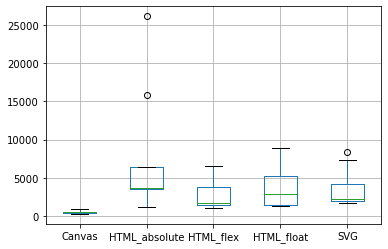

In [5]:
pivoted_data.boxplot(column=['Canvas', 'HTML_absolute', 'HTML_flex', 'HTML_float', 'SVG'])
pivoted_data.describe()

Let's calculate the 95% confidence interval for the mean of the SVG/Canvas Ratio

In [6]:
stats.t.interval(
    alpha=.95, # Confidence level
    df=len(pivoted_data)-1, # Degrees of freedom
    loc=pivoted_data.SVG_Canvas_Ratio.mean(), # Interval around the mean
    scale=stats.sem(pivoted_data.SVG_Canvas_Ratio) # Based on Standard Error of Mean
)

(4.3105449509645775, 9.064331114679796)

This means that we are **95%** confident that the Canvas method is between **4,3 times** and **9,1 times** faster than the SVG method - this pre-supposes that the data is normally distributed.

### How significant is the performance difference between HTML and SVG methods?

Using a paired-samples T-test

In [7]:
print("HTML_Float vs. SVG\n\t",stats.ttest_rel(pivoted_data.HTML_float,pivoted_data.SVG))
print("HTML_Flex vs. SVG\n\t",stats.ttest_rel(pivoted_data.HTML_flex,pivoted_data.SVG))
print("HTML_Absolute vs. SVG\n\t",stats.ttest_rel(pivoted_data.HTML_absolute,pivoted_data.SVG))
print("HTML_Float vs. HTML_Flex\n\t",stats.ttest_rel(pivoted_data.HTML_float,pivoted_data.HTML_flex))
print("HTML_Float vs. HTML_Absolute\n\t",stats.ttest_rel(pivoted_data.HTML_float,pivoted_data.HTML_absolute))
print("HTML_Flex vs. HTML_Absolute\n\t",stats.ttest_rel(pivoted_data.HTML_flex,pivoted_data.HTML_absolute))

HTML_Float vs. SVG
	 Ttest_relResult(statistic=0.12803975324254874, pvalue=0.90127767547389)
HTML_Flex vs. SVG
	 Ttest_relResult(statistic=-3.3365430521663435, pvalue=0.010283862582135104)
HTML_Absolute vs. SVG
	 Ttest_relResult(statistic=1.8994182385601117, pvalue=0.09405213168738685)
HTML_Float vs. HTML_Flex
	 Ttest_relResult(statistic=1.3678345732322368, pvalue=0.2085494722078407)
HTML_Float vs. HTML_Absolute
	 Ttest_relResult(statistic=-1.4423455350515662, pvalue=0.18718617724539943)
HTML_Flex vs. HTML_Absolute
	 Ttest_relResult(statistic=-2.0726193495204255, pvalue=0.071935675715265)


According to the paired sample T-test, the only significant difference is that **HTML-flex is faster than SVG**.
However, the values are not normally distributed - and cannot be, since we are testing different engines and different devices - so we should use the **Wilcoxon Sign-Rank test** instead!

In [8]:
print("HTML_Float vs. SVG\n\t",stats.wilcoxon(pivoted_data.HTML_float,pivoted_data.SVG))
print("HTML_Flex vs. SVG\n\t",stats.wilcoxon(pivoted_data.HTML_flex,pivoted_data.SVG))
print("HTML_Absolute vs. SVG\n\t",stats.wilcoxon(pivoted_data.HTML_absolute,pivoted_data.SVG))
print("HTML_Float vs. HTML_Flex\n\t",stats.wilcoxon(pivoted_data.HTML_float,pivoted_data.HTML_flex))
print("HTML_Float vs. HTML_Absolute\n\t",stats.wilcoxon(pivoted_data.HTML_float,pivoted_data.HTML_absolute))
print("HTML_Flex vs. HTML_Absolute\n\t",stats.wilcoxon(pivoted_data.HTML_flex,pivoted_data.HTML_absolute))

HTML_Float vs. SVG
	 WilcoxonResult(statistic=21.0, pvalue=0.91015625)
HTML_Flex vs. SVG
	 WilcoxonResult(statistic=0.0, pvalue=0.00390625)
HTML_Absolute vs. SVG
	 WilcoxonResult(statistic=3.0, pvalue=0.01953125)
HTML_Float vs. HTML_Flex
	 WilcoxonResult(statistic=17.0, pvalue=0.5703125)
HTML_Float vs. HTML_Absolute
	 WilcoxonResult(statistic=14.0, pvalue=0.359375)
HTML_Flex vs. HTML_Absolute
	 WilcoxonResult(statistic=2.0, pvalue=0.01171875)


### Which browser is faster on Windows?

In [9]:
pivoted_data = dataset[dataset.OS == 'Windows'].pivot(index=['approach','run_id','loop_type'],columns=['browser'],values='duration')
pivoted_data.describe()

browser,Chrome,Edge,Firefox
count,20.000000,20.00000,20.000000
mean,1158.750000,1166.05000,1026.150000
std,1055.087069,1090.13845,1072.134039
min,138.000000,130.00000,171.000000
25%,309.000000,336.00000,350.250000
50%,957.000000,713.00000,418.000000
75%,1477.000000,1707.00000,1615.500000
max,3578.000000,3739.00000,4247.000000


In [11]:
print("Anova\n\t", stats.f_oneway(
    pivoted_data.Chrome.dropna(),
    pivoted_data.Firefox.dropna(),
    pivoted_data.Edge.dropna()
))
print("Kruskal-Wallis Test\n\t", stats.kruskal(
    pivoted_data.Chrome.dropna(),
    pivoted_data.Firefox.dropna(),
    pivoted_data.Edge.dropna()
))

Anova
	 F_onewayResult(statistic=0.10781563702510699, pvalue=0.8979757492315468)
Kruskal-Wallis Test
	 KruskalResult(statistic=0.2540375691222003, pvalue=0.8807171285570579)
